In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [2]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw (Replication)"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed (Replication)"

In [3]:
img_1000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 1000m.tif")
band_1000 = img_1000.read(1)
band_1000.shape

(101, 101)

In [18]:
# Read Albedo raster image
img_6000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 6000m RE.tif")
band_6000 = img_6000.read(1)
band_6000.shape

(120, 120)

In [5]:
# Read Albedo raster image
img_10000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Cape 10000m RE.tif")
band_10000 = img_10000.read(1)
band_10000.shape

(100, 100)

In [19]:
# reshape the band arrays into one-dimensional array
band_1000_reshape = band_1000.reshape(-1)
band_6000_reshape = band_6000.reshape(-1)
band_10000_reshape = band_10000.reshape(-1)

In [7]:
# Get the coordinates n-dimensional array
list_Coordinates_1000 = []
for x in range(img_1000.shape[0]):
    for y in range(img_1000.shape[1]):
        temp_x, temp_y = img_1000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1000.append(temp_list)
arr_Coordinates_1000 = np.array(list_Coordinates_1000)
arr_Coordinates_1000

array([[ 333735., 8218775.],
       [ 333745., 8218775.],
       [ 333755., 8218775.],
       ...,
       [ 334715., 8217775.],
       [ 334725., 8217775.],
       [ 334735., 8217775.]])

In [20]:
# Get the coordinates n-dimensional array
list_Coordinates_6000 = []
for x in range(img_6000.shape[0]):
    for y in range(img_6000.shape[1]):
        temp_x, temp_y = img_6000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_6000.append(temp_list)
arr_Coordinates_6000 = np.array(list_Coordinates_6000)
arr_Coordinates_6000

array([[ 331255.04166667, 8221254.95833333],
       [ 331305.125     , 8221254.95833333],
       [ 331355.20833333, 8221254.95833333],
       ...,
       [ 337114.79166667, 8215295.04166667],
       [ 337164.875     , 8215295.04166667],
       [ 337214.95833333, 8215295.04166667]])

In [9]:
list_Coordinates_10000 = []
for x in range(img_10000.shape[0]):
    for y in range(img_10000.shape[1]):
        temp_x, temp_y = img_10000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_10000.append(temp_list)
arr_Coordinates_10000 = np.array(list_Coordinates_10000)
arr_Coordinates_10000

array([[ 329280.05, 8223229.95],
       [ 329380.15, 8223229.95],
       [ 329480.25, 8223229.95],
       ...,
       [ 338989.75, 8213320.05],
       [ 339089.85, 8213320.05],
       [ 339189.95, 8213320.05]])

In [10]:
# Get the maximum lag
diagonal_1000 = 1000 * (2 ** 0.5) / 2
bin_1000 = np.arange(10,diagonal_1000,30)
bin_1000[-1]

700.0

In [21]:
# Get the maximum lag
diagonal_6000 = 6000 * (2 ** 0.5) / 2
bin_6000 = np.arange(10,diagonal_6000,50)
bin_6000[-1]

4210.0

In [12]:
# Get the maximum lag
diagonal_10000 = 10000 * (2 ** 0.5) / 2
bin_10000 = np.arange(10,diagonal_10000,100)
bin_10000[-1]

7010.0

In [13]:
V_1000 = skg.Variogram(arr_Coordinates_1000, band_1000_reshape, use_nugget=True, bin_func=bin_1000, maxlag = bin_1000[-1])
V_1000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 449163.7705188951,
 'normalized_sill': 1.7548525695840617e-07,
 'normalized_nugget': 2.539834680611149e-07,
 'effective_range': 641.6625293127073,
 'sill': 0.00026648215697148156,
 'nugget': 0.0003856851770748207,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 700.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

In [22]:
V_6000 = skg.Variogram(arr_Coordinates_6000, band_6000_reshape, use_nugget=True, bin_func=bin_6000, maxlag = bin_6000[-1])

In [14]:
V_10000 = skg.Variogram(arr_Coordinates_10000, band_10000_reshape, use_nugget=True, bin_func=bin_10000, maxlag = bin_10000[-1])

In [23]:
range_1000 = V_1000.parameters[0]
sill_1000 = V_1000.parameters[1] + V_1000.parameters[2]
nugget_1000 = V_1000.parameters[2]
range_6000 = V_6000.parameters[0]
sill_6000 = V_6000.parameters[1] + V_6000.parameters[2]
nugget_6000 = V_6000.parameters[2]
range_10000 = V_10000.parameters[0]
sill_10000 = V_10000.parameters[1] + V_10000.parameters[2]
nugget_10000 = V_10000.parameters[2]
range_1000

641.6625293127073

In [24]:
from scipy.interpolate import interp1d
# Get the theoretical functions
def f_1000(x):
   return V_1000.fitted_model(x)
def f_6000(x):
   return V_6000.fitted_model(x)
def f_10000(x):
   return V_10000.fitted_model(x)
# Create cubic interpolation model in order to make curved plot (otherwise it will be ugly af)
cubic_model_1000 = interp1d(np.concatenate((np.array([0]),bin_1000)), f_1000(np.concatenate((np.array([0]),bin_1000)),), kind = "cubic")
cubic_model_6000 = interp1d(np.concatenate((np.array([0]),bin_6000)), f_6000(np.concatenate((np.array([0]),bin_6000)),), kind = "cubic")
cubic_model_10000 = interp1d(np.concatenate((np.array([0]),bin_10000)), f_10000(np.concatenate((np.array([0]),bin_10000)),), kind = "cubic")
x_1000 = np.linspace(0,bin_1000[-1])
x_6000 = np.linspace(0,bin_6000[-1])
x_10000 = np.linspace(0,bin_10000[-1])

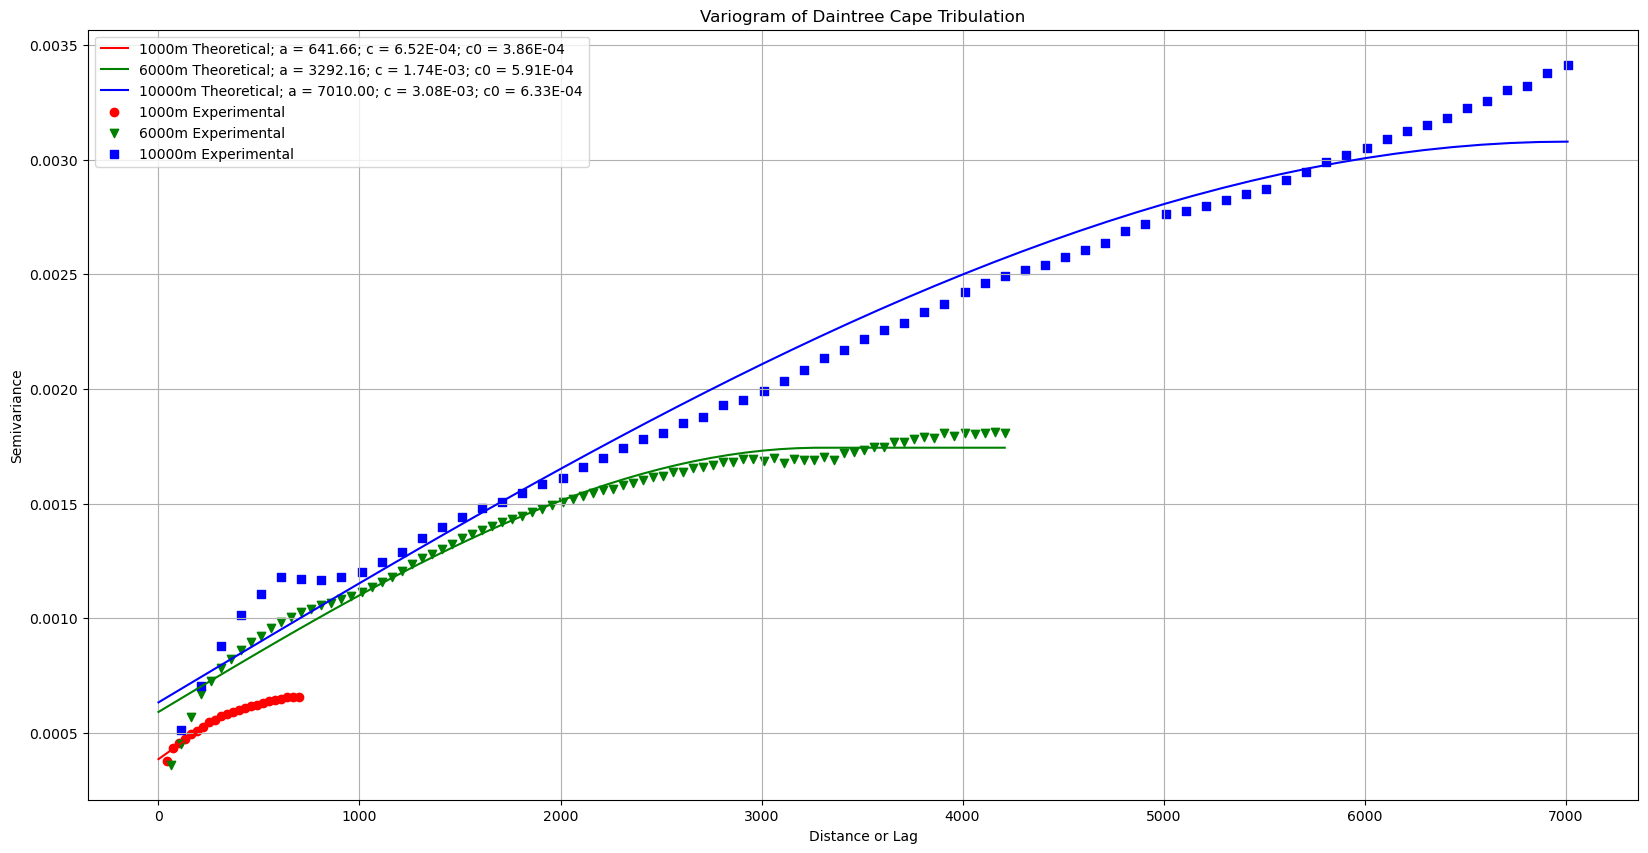

In [25]:
# Plot! 
plt.figure(figsize = (20,10))
plt.plot(x_1000, cubic_model_1000(x_1000), label = f'1000m Theoretical; a = {range_1000:.2F}; c = {sill_1000:.2E}; c0 = {nugget_1000:.2E}', color = 'Red', linestyle = '-')
plt.plot(x_6000, cubic_model_6000(x_6000), label = f'6000m Theoretical; a = {range_6000:.2F}; c = {sill_6000:.2E}; c0 = {nugget_6000:.2E}', color = 'Green', linestyle = '-')
plt.plot(x_10000, cubic_model_10000(x_10000), label = f'10000m Theoretical; a = {range_10000:.2F}; c = {sill_10000:.2E}; c0 = {nugget_10000:.2E}', color = 'Blue', linestyle = '-')
plt.scatter(V_1000.get_empirical()[0],V_1000.get_empirical()[1], color = 'Red', label = '1000m Experimental', marker = 'o')
plt.scatter(V_6000.get_empirical()[0],V_6000.get_empirical()[1], color = 'Green', label = '6000m Experimental', marker = 'v')
plt.scatter(V_10000.get_empirical()[0],V_10000.get_empirical()[1], color = 'Blue', label = '10000m Experimental', marker = 's')
plt.title("Variogram of Daintree Cape Tribulation")
plt.xlabel("Distance or Lag")
plt.ylabel("Semivariance")
plt.legend()
plt.grid()
# plt.savefig(cwd_Images_Processed + "\\" + site_Name + "\\Result.png")